# INTERATIVIDADE#

In [12]:
using Interact
using Reactive

## ELEMENTOS BASICOS##

### BOTÃO###

#### Botão básico ####

In [13]:
botao = button("Aperte Aqui")

display(botao)

foldp((acc, value) -> acc + 1, 0, signal(botao))

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Aperte Aqui",nothing)

0

<strong>Botão de Opção</strong>

In [14]:
botoes = togglebuttons([("Soma", +), ("Subtração", -), ("Multiplicação", *)])

display(botoes)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(+, nactions=0),"",+,"Soma",Interact.OptionDict(Any["Soma","Subtração","Multiplicação"],Dict{Any,Any}(Pair{Any,Any}("Soma",+),Pair{Any,Any}("Multiplicação",*),Pair{Any,Any}("Subtração",-))),Any[],Any[])

In [15]:
map(g -> g(2, 5), signal(botoes))

7

**Botão radio**

In [16]:
radiob = radiobuttons(Dict("Soma" => +, "Subtração" => -, "Multiplicação" => *))

Interact.Options{:RadioButtons,Any}(Signal{Any}(+, nactions=0),"",+,"Soma",Interact.OptionDict(Any["Soma","Multiplicação","Subtração"],Dict{Any,Any}(Pair{Any,Any}("Soma",+),Pair{Any,Any}("Multiplicação",*),Pair{Any,Any}("Subtração",-))),Any[],Any[])

In [17]:
map(g -> g(5, 2), signal(radiob))

3

** SLIDES**

In [18]:
# Slider

barra = slider(1:10,label="Numeros:")

display(barra)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"Numeros:",5,1:10,"d",true)

In [19]:
valor= map(x -> x*x, signal(barra))

64

** CHECKBOX**

In [20]:
cb = (checkbox(false))

Interact.Checkbox(Signal{Bool}(false, nactions=0),"",false)

In [21]:
ck = map(x -> x, signal(cb))

false

** DROPDOWN**

In [22]:
lista = dropdown(["Julia", "Sage", "Python"])

display(lista)

Interact.Options{:Dropdown,Any}(Signal{Any}(Julia, nactions=0),"","Julia","Julia",Interact.OptionDict(Any["Julia","Sage","Python"],Dict{Any,Any}(Pair{Any,Any}("Sage","Sage"),Pair{Any,Any}("Julia","Julia"),Pair{Any,Any}("Python","Python"))),Any[],Any[])

In [23]:
drop = map(x -> x, signal(lista))

"Julia"

**CAIXA DE TEXTO**

** TextoBox**

In [24]:
caixa_texto = textbox("5")

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in utf8(::String) at ./deprecated.jl:50
 in #textbox#11(::Array{Any,1}, ::Function, ::String) at /home/jmarcellopereira/.julia/v0.5/Interact/src/widgets.jl:151
 in textbox(::String) at /home/jmarcellopereira/.julia/v0.5/Interact/src/widgets.jl:151
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/jmarcellopereira/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/jmarcellopereira/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[24], in expression starting on line 1


Interact.Textbox{String}(Signal{String}(5, nactions=0),"",nothing,"5")

In [25]:
texto_numero = textbox(0.0, range=0.0:10.0)

Interact.Textbox{Float64}(Signal{Float64}(0.0, nactions=0),"",0.0:1.0:10.0,0.0)

In [26]:
h(x) = x^2

map(x -> h(x), (signal(texto_numero)))

25.0

** Area texto**

In [27]:
texto = textarea("Micro editor de  \$\\LaTeX\$")

Interact.Textarea{String}(Signal{String}(Micro editor de  $\LaTeX$, nactions=0),"","Micro editor de  \$\\LaTeX\$")

In [28]:
map(latex, signal(texto))

Interact.Latex("","Micro editor de  \$\\LaTeX\$")

## FUNÇÃO MANIPULATE##

A macro ** @manipulate ** permite manipulação de qualquer expressão usando widgets. Podemos, por exemplo, usar um slide e um botão para cronstruir diferentes tipos de gráficos

### GRÁFICO ###

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"Grau",25,0:50,"d",true)


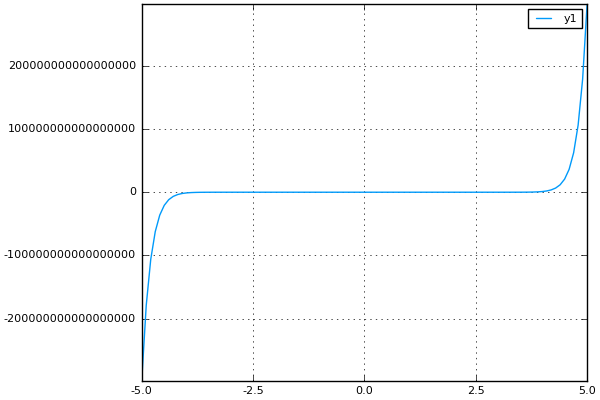

In [30]:
using Plots
pyplot()

@manipulate for Grau=0:50
    plot(x -> x^Grau + 2*x + 10,-5,5)
end

In [32]:
using SymPy
@vars x

@manipulate for n=0:20
    (diff(sin(x)*x, x, n))
end

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"n",10,0:20,"d",true)

-x*sin(x) + 10*cos(x)

### ANIMAÇÃO ###

Interact.Options{:ToggleButtons,Any}(Signal{Any}(red, nactions=0),"color","red","red",Interact.OptionDict(Any["red","blue","black"],Dict{Any,Any}(Pair{Any,Any}("blue","blue"),Pair{Any,Any}("black","black"),Pair{Any,Any}("red","red"))),Any[],Any[])

Interact.Slider{Int64}(Signal{Int64}(11, nactions=0),"n",11,3:20,"d",true)

0.0

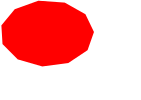

In [10]:
using Colors
using Compose

@manipulate for color=["red", "blue", "black"], n=3:20, ticks=fps(5.0)
    t = time()
    Compose.compose(context(), fill(parse(Colorant, color)),
    polygon([((1+sin(w+t))/3, (1+cos(w+t))/3) for w in 0:2pi/n:2*pi]))
end

In [11]:
using Interact, Reactive

timer = togglebutton("Ligar tempo")
reset = button("resetar", value = :reset)
map(display, [timer,reset])

dt = 0.1
sig = merge(filterwhen(signal(timer), 0, every(float(dt))), signal(reset))
foldp((acc,val) -> val == :reset ? 0 : acc + dt, 0., sig)

Interact.ToggleButton(Signal{Bool}(false, nactions=0),"Ligar tempo",false)

Interact.Button{Symbol}(Signal{Symbol}(reset, nactions=0),"resetar",:reset)

0.0